In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
import seaborn as sns 

In [3]:
df = pd.read_csv('train.csv') #Read the dataset

In [4]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format

In [5]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [6]:
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

In [9]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Postal code for Burlington city
df.nunique()
df.to_csv('welldone.csv')

In [12]:
from sklearn.model_selection import train_test_split
x = df.drop(['Sales','Order ID'], axis = 1)
y = df['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
Order Date,,,,,,,,,,,,,,
2016-09-12,2016-09-17,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,New York City,New York,10035.0,East,OFF-LA-10001317,Office Supplies,Labels,Avery 520
2016-09-25,2016-09-29,Standard Class,EH-13990,Erica Hackney,Consumer,United States,Meriden,Connecticut,6450.0,East,OFF-AR-10004930,Office Supplies,Art,Turquoise Lead Holder with Pocket Clip
2017-12-30,2018-01-04,Standard Class,BM-11785,Bryan Mills,Consumer,United States,Columbus,Ohio,43229.0,East,OFF-SU-10001664,Office Supplies,Supplies,Acme Office Executive Series Stainless Steel T...
2015-10-18,2015-10-22,Standard Class,EH-13765,Edward Hooks,Corporate,United States,Philadelphia,Pennsylvania,19134.0,East,OFF-PA-10003016,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads"
2018-04-24,2018-04-27,First Class,LS-16945,Linda Southworth,Corporate,United States,Providence,Rhode Island,2908.0,East,TEC-AC-10004855,Technology,Accessories,V7 USB Numeric Keypad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27,2018-08-01,Second Class,DK-13375,Dennis Kane,Consumer,United States,Seattle,Washington,98115.0,West,TEC-AC-10000991,Technology,Accessories,Sony Micro Vault Click 8 GB USB 2.0 Flash Drive
2018-11-21,2018-11-25,Standard Class,PJ-18835,Patrick Jones,Corporate,United States,San Francisco,California,94122.0,West,OFF-AR-10003394,Office Supplies,Art,Newell 332
2017-06-20,2017-06-24,Standard Class,CG-12040,Catherine Glotzbach,Home Office,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-PA-10001870,Office Supplies,Paper,Xerox 202


In [1]:
Top_states = df["State"].value_counts()
# Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe
# Top_states.columns(['State', 'Density'])
Top_states

NameError: name 'df' is not defined

<Axes: xlabel='State'>

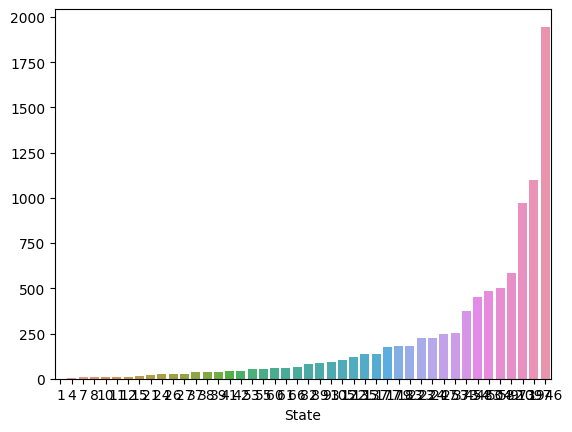

: 

In [50]:
sns.barplot(data=Top_states,  x=Top_states.index, y=Top_states.values)    

In [24]:
Top_states.head()

California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: State, dtype: int64

In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])